In [52]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd

In [10]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append(f'E:\gitlab\custom-script\script')
from ursar import interpretable,model,describe
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load data

In [3]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
breast_cancer_df = pd.DataFrame(data=breast_cancer.data, columns = breast_cancer.feature_names)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_df, breast_cancer.target, train_size=0.9,
                                                    stratify=breast_cancer.target, random_state=123)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((512, 30), (57, 30), (512,), (57,))

In [5]:
list_model = ['lr']

In [6]:
models,names_model,probs_model,probs_bool_model,pred_model,time_1,time_2 = model.modeling(
    X_train, X_test, y_train, y_test,list_model=list_model,types='classification')

we have done with these models:
Logistic_Regression


# SHAP

In [64]:
interpretable.shap_explainer(X_test,models[0],no_test=9,types='single',
                             types_exp='linier',X_train=X_train,col=[None,None])

In [68]:
interpretable.shap_explainer(X_test,models[0],no_test=len(X_test),types='multiple',
                             types_exp='linier',X_train=X_train,col=[None,None])

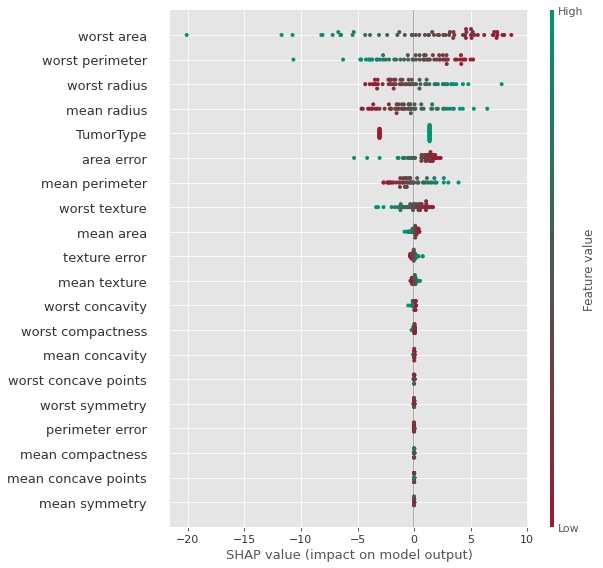

None

In [69]:
interpretable.shap_explainer(X_test,models[0],no_test=len(X_test),types='if',
                             types_exp='linier',X_train=X_train,col=[None,None])

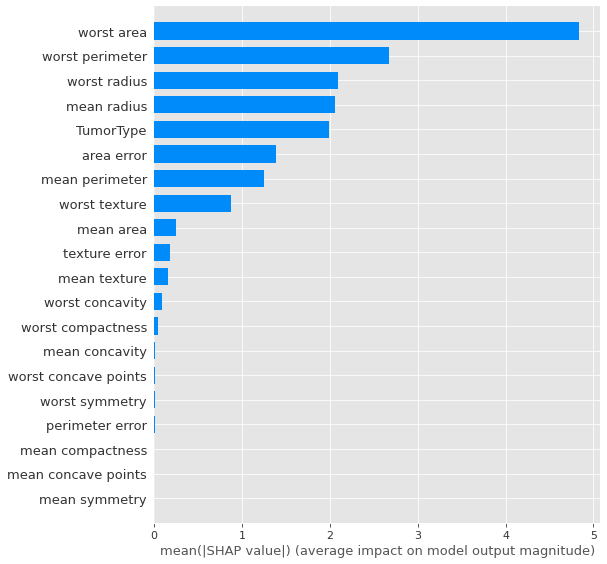

In [71]:
interpretable.shap_explainer(X_test,models[0],no_test=len(X_test),types='if_bar',
                             types_exp='linier',X_train=X_train,col=[None,None])

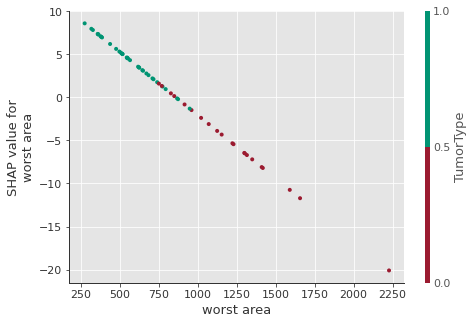

None

In [74]:
interpretable.shap_explainer(X_test,models[0],no_test=len(X_test),types='interaction',
                             types_exp='linier',X_train=X_train,col=["worst area","TumorType"])

## Local Interpretability

The expected value is  -0.23981834314426587


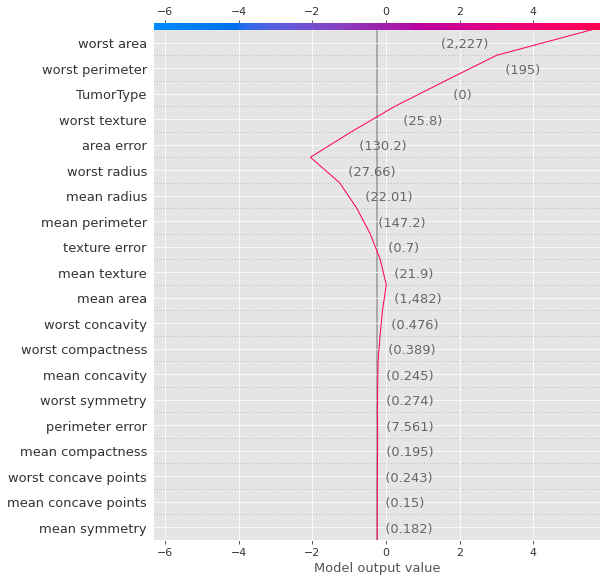

In [75]:
interpretable.shap_explainer(X_test,models[0],no_test=7,types='decision',
                             types_exp='linier',X_train=X_train,col=[None,None])

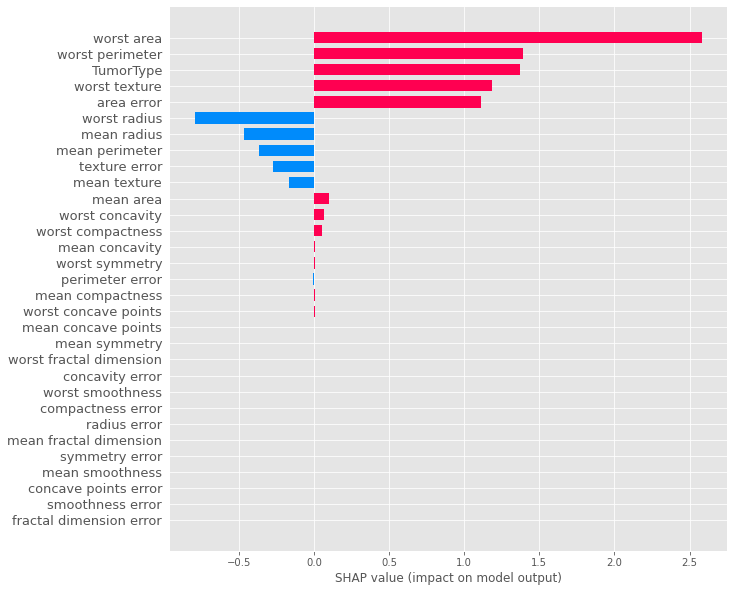

In [76]:
interpretable.shap_explainer(X_test,models[0],no_test=7,types='bar',
                             types_exp='linier',X_train=X_train,col=[None,None])

Estimating transforms:   0%|          | 0/1000 [00:00<?, ?it/s]

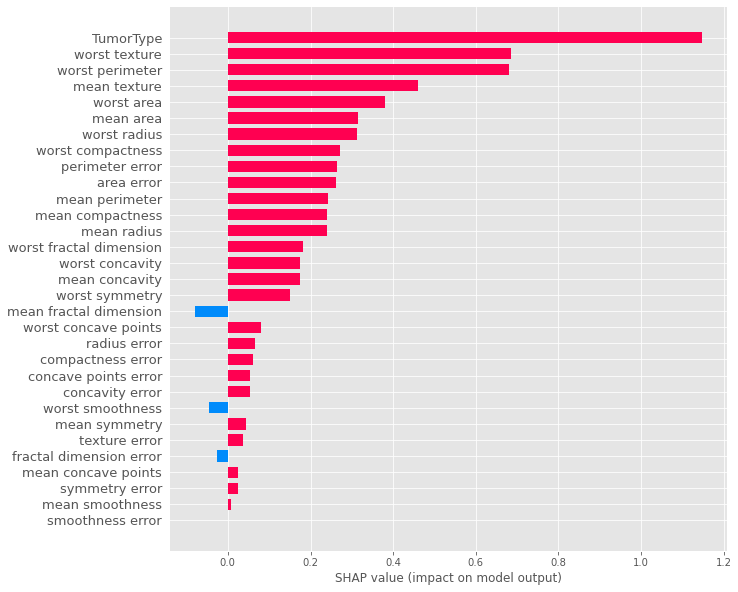

In [77]:
interpretable.shap_explainer(X_test,models[0],no_test=7,types='bar',
                             types_exp='linier',X_train=X_train,col=[None,None],
                            feature_perturbation='correlation_dependent')

# LIME

## Classification

Intercept 0.41140218173633786
Prediction_local [0.70534994]
Right: 0.9853962023220417


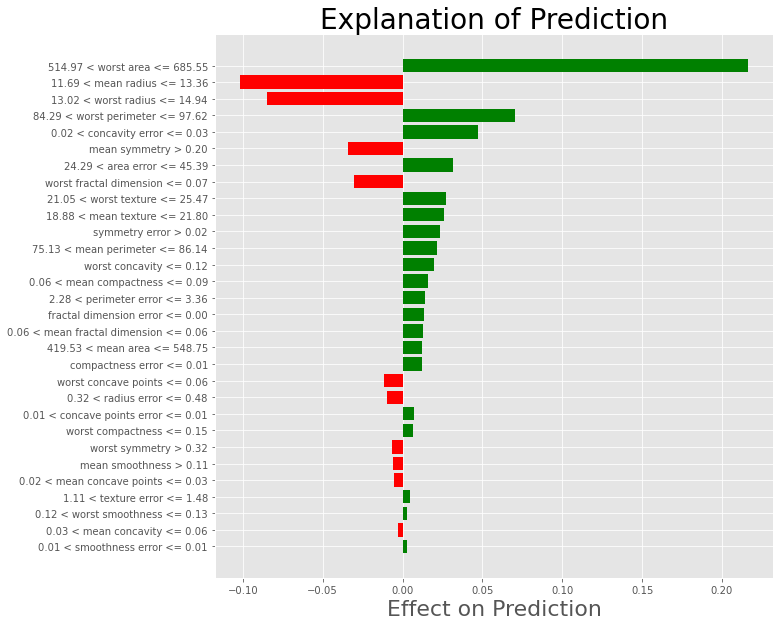

In [49]:
interpretable.inter_lime(X_train,X_test,19,models[0],mode="classification",
                         fn=breast_cancer.feature_names,cr=False,cn=['malignant', 'benign'],
                         tl=None,cat=None,dc=True,veb=True,dis='quartile',pickle=False)

Intercept 0.606458856055175
Prediction_local [0.20252703]
Right: 7.692164894726447e-07
Intercept 0.04560888175394445
Prediction_local [0.79016511]
Right: 0.9999985582266551


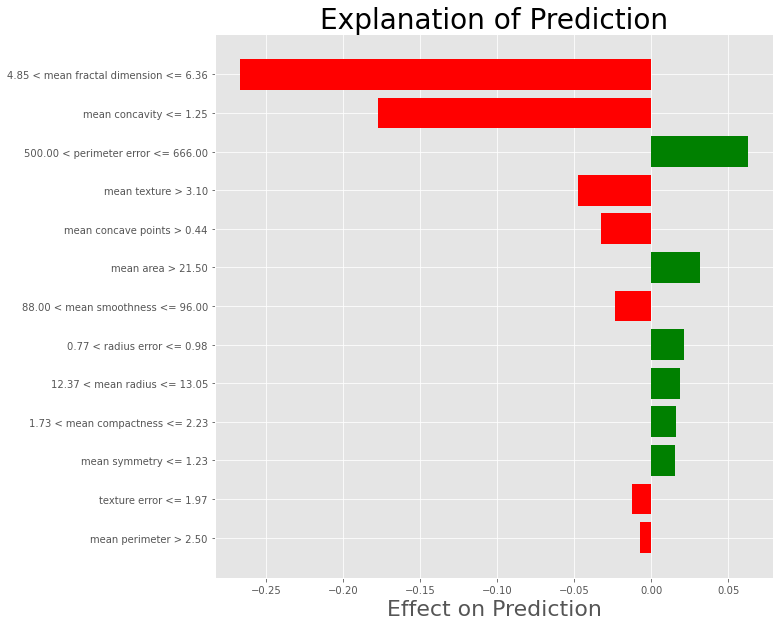

criteria     value
2      500.00 < perimeter error <= 666.00  0.062475
5                       mean area > 21.50  0.031364
7             0.77 < radius error <= 0.98  0.021056
8            12.37 < mean radius <= 13.05  0.018542
9         1.73 < mean compactness <= 2.23  0.015879
10                  mean symmetry <= 1.23  0.015096
12                  mean perimeter > 2.50 -0.007189
11                  texture error <= 1.97 -0.012565
6        88.00 < mean smoothness <= 96.00 -0.023627
4              mean concave points > 0.44 -0.032793
3                     mean texture > 3.10 -0.047373
1                  mean concavity <= 1.25 -0.177841
0   4.85 < mean fractal dimension <= 6.36 -0.266958

In [91]:
interpretable.inter_lime(X_train,X_test,19,models[0],mode="classification",
                         fn=breast_cancer.feature_names,cr=True,cn=['malignant', 'benign'],
                         tl=None,cat=None,dc=True,veb=True,dis='quartile',pickle=False)

## Multi-Class

In [75]:
from sklearn.datasets import load_wine
wine = load_wine()
X, Y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.80, test_size=0.2, stratify=Y, random_state=123)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((142, 13), (36, 13), (142,), (36,))

In [76]:
models,names_model,probs_model,probs_bool_model,pred_model,time_1,time_2 = model.modeling(
    X_train, X_test, y_train, y_test,list_model=['gb'],types='classification')

we have done with these models:
Gradient_boosting_Classifier


Intercept 0.3309753881583724
Prediction_local [0.03271152]
Right: 6.725568556062894e-07
Intercept 0.6429213118950516
Prediction_local [0.08206061]
Right: 7.692164894726447e-07
Intercept 0.02610329994657573
Prediction_local [0.88522787]
Right: 0.9999985582266551


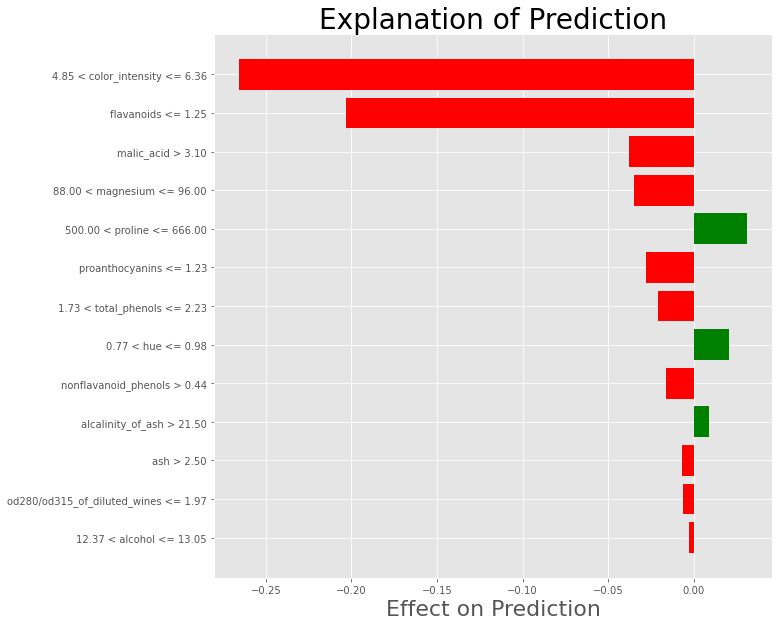

criteria     value
4             500.00 < proline <= 666.00  0.030954
7                     0.77 < hue <= 0.98  0.020522
9              alcalinity_of_ash > 21.50  0.008932
12              12.37 < alcohol <= 13.05 -0.002948
11  od280/od315_of_diluted_wines <= 1.97 -0.006096
10                            ash > 2.50 -0.006755
8            nonflavanoid_phenols > 0.44 -0.015915
6           1.73 < total_phenols <= 2.23 -0.020604
5                proanthocyanins <= 1.23 -0.027794
3             88.00 < magnesium <= 96.00 -0.034867
2                      malic_acid > 3.10 -0.037758
1                     flavanoids <= 1.25 -0.203128
0         4.85 < color_intensity <= 6.36 -0.265403

In [90]:
interpretable.inter_lime(X_train,X_test,19,models[0],mode="classification",
                         fn=wine.feature_names,cr=True,cn=wine.target_names,
                         tl=None,cat=None,dc=True,veb=True,dis='quartile',pickle=False)

## Regression

In [70]:
from sklearn.datasets import load_boston
boston = load_boston()
X, Y = boston.data, boston.target

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.90, test_size=0.1, random_state=123, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 13), (51, 13), (455,), (51,))

In [71]:
list_model = ['linear']

In [73]:
models,names_model,probs_model,probs_bool_model,pred_model,time_1,time_2 = model.modeling(
    X_train, X_test, y_train, y_test,list_model=list_model,types='regression')

we have done with these models:
Linear_Regression


Intercept 28.514982907281727
Prediction_local [10.03689398]
Right: 15.857282252950192


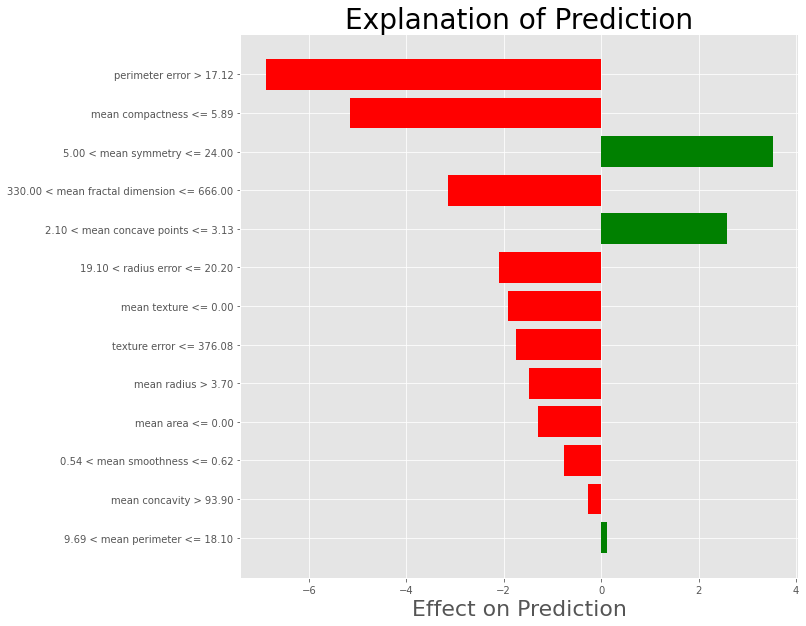

criteria     value
2               5.00 < mean symmetry <= 24.00  3.528615
4          2.10 < mean concave points <= 3.13  2.580120
12             9.69 < mean perimeter <= 18.10  0.122843
11                     mean concavity > 93.90 -0.263460
10             0.54 < mean smoothness <= 0.62 -0.760671
9                           mean area <= 0.00 -1.288020
8                          mean radius > 3.70 -1.475823
7                     texture error <= 376.08 -1.737598
6                        mean texture <= 0.00 -1.920414
5               19.10 < radius error <= 20.20 -2.090312
3   330.00 < mean fractal dimension <= 666.00 -3.135741
1                    mean compactness <= 5.89 -5.155586
0                     perimeter error > 17.12 -6.882042

In [74]:
interpretable.inter_lime(X_train,X_test,19,models[0],mode="regression",
                         fn=breast_cancer.feature_names,cr=True,
                         tl=None,cat=None,dc=True,veb=True,dis='quartile',pickle=False)